In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 기본 패키지 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 글꼴 경로 지정
font_path = '/content/drive/MyDrive/Weekly_project_TeamID/예진/NanumGothic.ttf'

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

# 데이터 불러오기

path = '/content/drive/MyDrive/Weekly_project_TeamID/Data/Airbnb_London/combined_reviews.csv'


df_review = pd.read_csv(path, encoding='utf-8')

df_review.dropna(subset=['리뷰'],inplace=True)

#date >> 데이터타입 변경 datatime

df_review['리뷰날짜'] = pd.to_datetime(df_review['리뷰날짜'])



In [3]:
path = '/content/drive/MyDrive/Weekly_project_TeamID/Data/Airbnb_London/전처리된_listing.csv'


london_lists = pd.read_csv(path, encoding='utf-8')

In [4]:
review_recent = df_review[df_review['리뷰날짜'].dt.year >= 2022]

In [5]:
import pandas as pd

# 리뷰 데이터가 담긴 DataFrame (예: df)
# 예시로 df를 생성합니다. 실제 데이터 프레임을 사용하세요.
# df = pd.read_csv('path_to_your_file.csv')

# 10,000개의 랜덤 샘플 추출
review_10 = review_recent.sample(n=50000, random_state=42)


# 결과를 확인합니다.
print(review_10)

           숙소_id       리뷰날짜                                                 리뷰
400819  21980231 2022-09-04  The home is so adorable. Fantastic accommodati...
651246  27598715 2023-03-31  Very pleasant apartment, ideally located? (3 m...
430892  24507428 2023-06-09  We loved  our stay at Jack’s place. So close t...
322584  17517605 2022-06-22  Nice flat situated in a good location. The pho...
229212  12004105 2022-07-06  The garden cottage was clean and comfortable. ...
...          ...        ...                                                ...
490304  30123175 2022-06-30  Good location, amenities, and reliable host. T...
596425   5000458 2023-08-21  I felt at home. Sally and her husband are incr...
426775  24175583 2023-05-14  Beautiful home, well situated in the heart of ...
478652  29237511 2023-07-13  Andrew was a great host. Excellent instruction...
450529  26400351 2022-01-16                          Great place. Recommended!

[50000 rows x 3 columns]


In [6]:
import pandas as pd

# 리뷰 데이터가 담긴 DataFrame (예: df)
# 예시로 df를 생성합니다. 실제 데이터 프레임을 사용하세요.
# df = pd.read_csv('path_to_your_file.csv')

# 10,000개의 랜덤 샘플
df_review = review_10.sample(n=7374, random_state=42)


# 결과를 확인합니다.
# print(review_10)

In [7]:
review_df = review_10.drop_duplicates(subset='숙소_id', keep=False)

In [8]:
review_df.shape

(1239, 3)

In [9]:
review_df['숙소_id'].drop_duplicates().values.tolist()
lists_10 = london_lists[london_lists['숙소_id'].isin(review_df['숙소_id'].drop_duplicates().values.tolist())]

In [10]:
lists_10

,숙소_id,숙소_url,호스트_id,슈퍼호스트,숙소_지역,숙소_특징,숙소_유형,수용_인원수,욕실수,침실수,...,마지막리뷰,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,게스트선호
6,314164,https://www.airbnb.com/rooms/314164,1614205,f,Hackney,Entire home,Entire home/apt,6,1.5,3.0,...,2023-08-24,4.82,4.90,4.64,4.82,5.00,4.82,4.73,0.09,f
11,174635,https://www.airbnb.com/rooms/174635,675616,f,Kensington and Chelsea,Entire rental unit,Entire home/apt,2,1.0,1.0,...,2024-01-16,4.24,4.24,4.00,4.26,4.47,4.35,3.95,0.31,f
16,38610,https://www.airbnb.com/rooms/38610,165579,f,Hammersmith and Fulham,Entire townhouse,Entire home/apt,7,2.0,4.0,...,2023-08-27,4.83,4.86,4.60,5.00,4.98,4.79,4.69,0.30,f
25,321411,https://www.airbnb.com/rooms/321411,1438723,f,Kensington and Chelsea,Private room in rental unit,Private room,1,1.5,1.0,...,2024-01-07,4.85,4.94,4.79,4.91,4.94,4.97,4.85,0.26,f
40,326655,https://www.airbnb.com/rooms/326655,43039,f,Lambeth,Entire rental unit,Entire home/apt,5,1.0,1.0,...,2023-10-13,4.79,4.88,4.86,4.75,4.84,4.73,4.50,0.35,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8580,38999012,https://www.airbnb.com/rooms/38999012,33797837,f,Barnet,Entire rental unit,Entire home/apt,5,1.5,2.0,...,2024-01-15,4.44,4.78,4.11,4.67,4.89,4.67,4.22,0.17,f
8581,38843060,https://www.airbnb.com/rooms/38843060,105564995,f,Hammersmith and Fulham,Entire rental unit,Entire home/apt,5,2.0,2.0,...,2023-12-11,4.33,4.33,4.33,4.67,4.33,4.50,4.33,0.12,f
8586,38772608,https://www.airbnb.com/rooms/38772608,3809876,f,Kensington and Chelsea,Entire home,Entire home/apt,6,3.0,3.0,...,2023-11-01,5.00,4.75,4.92,4.92,4.92,5.00,4.67,0.23,f
8587,39001718,https://www.airbnb.com/rooms/39001718,296801382,f,Enfield,Private room in townhouse,Private room,2,1.0,1.0,...,2023-12-19,4.62,4.57,4.71,4.81,4.86,4.29,4.52,0.39,f


병합

In [11]:
df = pd.merge(lists_10, review_df[['숙소_id', '리뷰날짜', '리뷰']], on='숙소_id', how='left')

In [12]:
df.shape

(1239, 29)

In [13]:
df.head()

,숙소_id,숙소_url,호스트_id,슈퍼호스트,숙소_지역,숙소_특징,숙소_유형,수용_인원수,욕실수,침실수,...,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,게스트선호,리뷰날짜,리뷰
0,314164,https://www.airbnb.com/rooms/314164,1614205,f,Hackney,Entire home,Entire home/apt,6,1.5,3.0,...,4.90,4.64,4.82,5.00,4.82,4.73,0.09,f,2022-08-11,The house was perfect with children. Near to t...
1,174635,https://www.airbnb.com/rooms/174635,675616,f,Kensington and Chelsea,Entire rental unit,Entire home/apt,2,1.0,1.0,...,4.24,4.00,4.26,4.47,4.35,3.95,0.31,f,2024-01-16,This was a wonderful stay! Eric was incredibly...
2,38610,https://www.airbnb.com/rooms/38610,165579,f,Hammersmith and Fulham,Entire townhouse,Entire home/apt,7,2.0,4.0,...,4.86,4.60,5.00,4.98,4.79,4.69,0.30,f,2022-12-19,"Great position, neighbors, grocery shop, trans..."
3,321411,https://www.airbnb.com/rooms/321411,1438723,f,Kensington and Chelsea,Private room in rental unit,Private room,1,1.5,1.0,...,4.94,4.79,4.91,4.94,4.97,4.85,0.26,f,2022-07-29,"Just like everyone said, Neried aka Neri's pro..."
4,326655,https://www.airbnb.com/rooms/326655,43039,f,Lambeth,Entire rental unit,Entire home/apt,5,1.0,1.0,...,4.88,4.86,4.75,4.84,4.73,4.50,0.35,f,2022-07-13,Adriano was very accomodating and the inside o...


In [14]:
df['게스트선호'] = df['게스트선호'].replace({'t' : 1, 'f':0}) #인코딩


In [15]:
# 숫자형 컬럼만 선별
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# df 복사
london_log = df.copy()

# 로그 변환
london_log[numeric_columns] = np.log1p(df[numeric_columns])

In [16]:
london_log[numeric_columns]

,숙소_id,호스트_id,수용_인원수,욕실수,침실수,침대수,숙소_가격,리뷰수,12개월리뷰수,30일리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,게스트선호
0,12.657674,14.294354,1.945910,0.916291,1.386294,1.386294,4.927254,2.484907,1.098612,0.0,1.761300,1.774952,1.729884,1.761300,1.791759,1.761300,1.745716,0.086178,0.0
1,12.070459,13.423382,1.098612,0.693147,0.693147,0.693147,5.525453,3.871201,0.693147,0.0,1.656321,1.656321,1.609438,1.660131,1.699279,1.677097,1.599388,0.270027,0.0
2,10.561292,12.017210,2.079442,1.098612,1.609438,1.609438,5.655992,3.761200,1.098612,0.0,1.763017,1.768150,1.722767,1.791759,1.788421,1.756132,1.738710,0.262364,0.0
3,12.680479,14.179267,0.693147,0.916291,0.693147,0.000000,4.248495,3.555348,2.302585,0.0,1.766442,1.781709,1.756132,1.776646,1.781709,1.786747,1.766442,0.231112,0.0
4,12.696663,10.669885,1.791759,0.693147,0.693147,1.386294,4.744932,3.931826,1.386294,0.0,1.756132,1.771557,1.768150,1.749200,1.764731,1.745716,1.704748,0.300105,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,17.479047,17.335907,1.791759,0.916291,1.098612,1.386294,4.836282,2.302585,1.791759,0.0,1.693779,1.754404,1.631199,1.735189,1.773256,1.735189,1.652497,0.157004,0.0
1235,17.475040,18.474837,1.791759,1.098612,1.098612,1.386294,5.703782,1.945910,1.098612,0.0,1.673351,1.673351,1.673351,1.735189,1.673351,1.704748,1.673351,0.113329,0.0
1236,17.473225,15.153107,1.945910,1.386294,1.386294,1.386294,5.993961,2.564949,2.079442,0.0,1.791759,1.749200,1.778336,1.778336,1.778336,1.791759,1.735189,0.207014,0.0
1237,17.479116,19.508574,1.098612,0.693147,0.693147,0.693147,3.583519,3.091042,2.484907,0.0,1.726332,1.717395,1.742219,1.759581,1.768150,1.665818,1.708378,0.329304,0.0


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# StandardScaler 적용
scaler_standard = StandardScaler()
london_standard = df.copy()
london_standard_log = london_log.copy()
london_standard[numeric_columns] = scaler_standard.fit_transform(df[numeric_columns]) # 수치형 데이터만 사용
london_standard_log[numeric_columns] = scaler_standard.fit_transform(london_log[numeric_columns])

# MinMaxScaler 적용
scaler_minmax = MinMaxScaler()
london_normal = df.copy()
london_normal_log = london_log.copy()
london_normal[numeric_columns] = scaler_minmax.fit_transform(df[numeric_columns])
london_normal_log[numeric_columns] = scaler_minmax.fit_transform(london_log[numeric_columns])

In [18]:
london_standard_selected = london_standard[numeric_columns] #스탠다드
london_normal_selected = london_normal[numeric_columns] #민맥스
london_standard_log_selected = london_standard_log[numeric_columns]
london_normal_log_selected = london_normal_log[numeric_columns]

In [19]:
london_normal.columns

Index(['숙소_id', '숙소_url', '호스트_id', '슈퍼호스트', '숙소_지역', '숙소_특징', '숙소_유형',
       '수용_인원수', '욕실수', '침실수', '침대수', '편의시설', '숙소_가격', '예약가능여부', '리뷰수',
       '12개월리뷰수', '30일리뷰수', '마지막리뷰', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수',
       '게스트선호', '리뷰날짜', '리뷰'],
      dtype='object')

요인분석

In [20]:
# 회귀분석 결과로 선택한 컬럼만 불러오기
columns_lr_selected = ['수용_인원수', '침실수', '숙소_가격', '리뷰수', '12개월리뷰수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수', '게스트선호','리뷰점수']
normal_df = london_normal[columns_lr_selected]

In [21]:
normal_df.head()

,수용_인원수,침실수,숙소_가격,리뷰수,12개월리뷰수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,게스트선호,리뷰점수
0,0.833333,0.375,0.241237,0.025445,0.030303,0.975,0.9100,0.9550,1.0000,0.9550,0.9325,0.013216,0.0,0.9550
1,0.166667,0.125,0.474227,0.117048,0.000000,0.810,0.7500,0.8150,0.8675,0.8375,0.7375,0.061674,0.0,0.8100
2,1.000000,0.500,0.546392,0.104326,0.030303,0.965,0.9000,1.0000,0.9950,0.9475,0.9225,0.059471,0.0,0.9575
3,0.000000,0.125,0.101031,0.083969,0.242424,0.985,0.9475,0.9775,0.9850,0.9925,0.9625,0.050661,0.0,0.9625
4,0.666667,0.125,0.193814,0.124682,0.060606,0.970,0.9650,0.9375,0.9600,0.9325,0.8750,0.070485,0.0,0.9475


In [22]:
normal_df.shape

(1239, 14)

In [23]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [24]:
!pip install factor-analyzer

/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


KMO: 0.8420722126099726, Bartlett p-value: 0.0


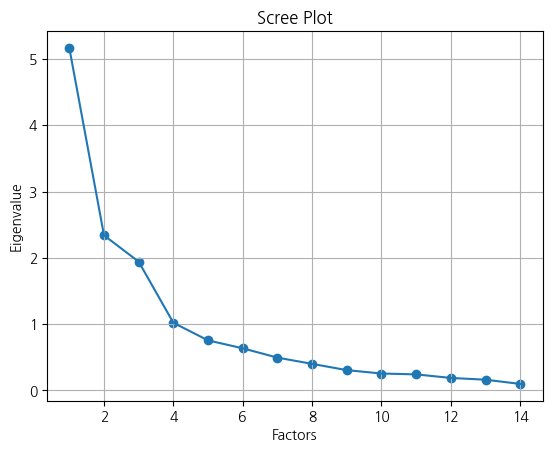

In [25]:
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

# KMO와 Bartlett 테스트
kmo_all, kmo_model = calculate_kmo(london_normal[columns_lr_selected])
bartlett_chi_square_value, bartlett_p_value = calculate_bartlett_sphericity(london_normal[columns_lr_selected])
print(f"KMO: {kmo_model}, Bartlett p-value: {bartlett_p_value}")

# 고유값 계산
fa = FactorAnalyzer(n_factors=len(columns_lr_selected), rotation=None)
fa.fit(london_normal[columns_lr_selected])
ev, v = fa.get_eigenvalues()

# Scree Plot
plt.scatter(range(1, len(ev) + 1), ev)
plt.plot(range(1, len(ev) + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/factor_analyzer/factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


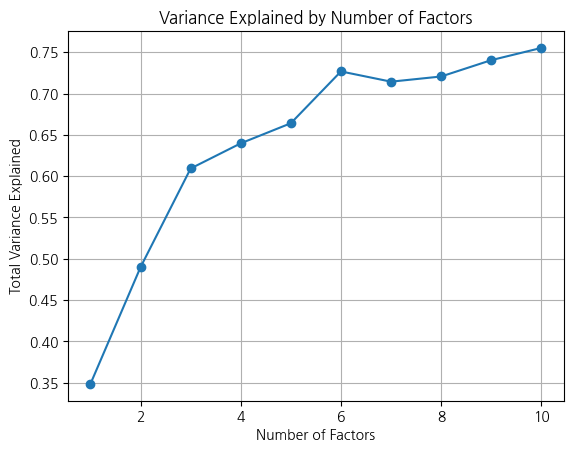

In [26]:
# 요인 수를 1부터 10까지 변화시키며 분산 설명 비율 계산
total_variance = []
for n in range(1, 11):
    fa = FactorAnalyzer(n_factors=n, rotation="varimax")
    fa.fit(london_normal[columns_lr_selected])
    total_variance.append(fa.get_factor_variance()[1].sum())

plt.plot(range(1, 11), total_variance, marker='o')
plt.xlabel('Number of Factors')
plt.ylabel('Total Variance Explained')
plt.title('Variance Explained by Number of Factors')
plt.grid()
plt.show()

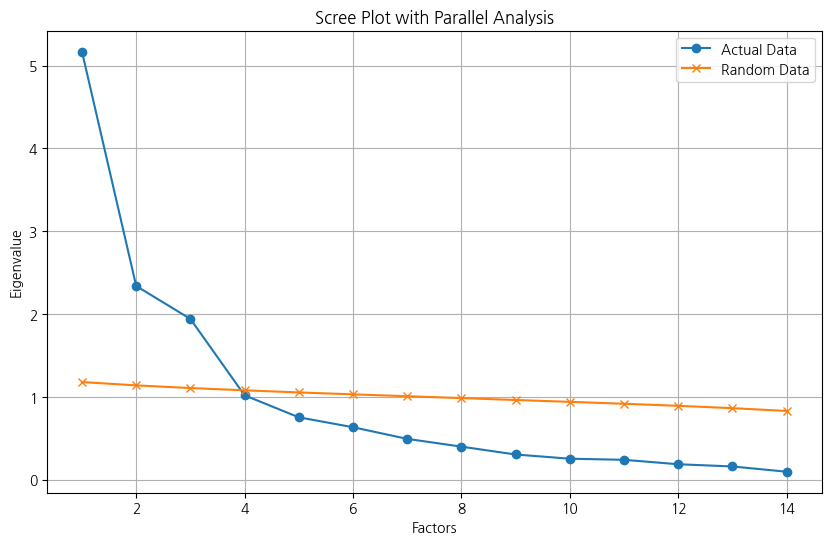

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

# 데이터 준비
data = london_normal[columns_lr_selected]

# 실제 데이터의 고유값 계산
fa = FactorAnalyzer(n_factors=len(columns_lr_selected), rotation=None)
fa.fit(data)
ev, v = fa.get_eigenvalues()

# 무작위 데이터의 고유값 계산 함수
def get_random_eigenvalues(data, n_iter=1000):
    random_ev = []
    for _ in range(n_iter):
        random_data = np.random.normal(size=data.shape)
        fa.fit(random_data)
        ev, _ = fa.get_eigenvalues()
        random_ev.append(ev)
    return np.mean(random_ev, axis=0)

# 무작위 데이터의 평균 고유값 계산
random_ev = get_random_eigenvalues(data)

# Scree Plot 및 평행 분석 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ev) + 1), ev, marker='o', label='Actual Data')
plt.plot(range(1, len(random_ev) + 1), random_ev, marker='x', label='Random Data')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot with Parallel Analysis')
plt.legend()
plt.grid()
plt.show()


In [28]:
# 평행 분석 결과 기반 요인 수 결정
n_factors_parallel = np.sum(ev > random_ev)
print(f"Parallel Analysis suggests {n_factors_parallel} factors")

Parallel Analysis suggests 3 factors


In [29]:
# 선택된 요인 수로 요인 분석 수행
fa = FactorAnalyzer(n_factors=n_factors_parallel, rotation="varimax")
fa.fit(data)

# 데이터프레임화
london_loadings = pd.concat(
    [pd.DataFrame(fa.loadings_, columns=[f'Factor{i + 1}' for i in range(n_factors_parallel)]),
     pd.DataFrame(data.columns.tolist(), columns=['name of columns'])],
    axis=1
)
london_loadings

,Factor1,Factor2,Factor3,name of columns
0,-0.044661,0.949868,0.003017,수용_인원수
1,0.041271,0.747841,-0.070780,침실수
2,0.034910,0.702099,-0.006831,숙소_가격
3,0.017209,-0.068047,0.642753,리뷰수
4,0.070898,0.014875,0.508035,12개월리뷰수
5,0.918333,0.018720,0.028475,숙소_정확성_리뷰점수
6,0.793603,0.003993,0.032629,숙소_청결도_리뷰점수
7,0.772747,-0.009332,0.010792,숙소_체크인_리뷰점수
8,0.839632,0.030032,0.033286,숙소_소통_리뷰점수
9,0.579206,0.134738,0.045494,숙소_위치_리뷰점수


In [30]:
# 요인 부하량 확인
loadings = fa.loadings_
print(pd.DataFrame(loadings, index=data.columns))

                    0         1         2
수용_인원수      -0.044661  0.949868  0.003017
침실수          0.041271  0.747841 -0.070780
숙소_가격        0.034910  0.702099 -0.006831
리뷰수          0.017209 -0.068047  0.642753
12개월리뷰수      0.070898  0.014875  0.508035
숙소_정확성_리뷰점수  0.918333  0.018720  0.028475
숙소_청결도_리뷰점수  0.793603  0.003993  0.032629
숙소_체크인_리뷰점수  0.772747 -0.009332  0.010792
숙소_소통_리뷰점수   0.839632  0.030032  0.033286
숙소_위치_리뷰점수   0.579206  0.134738  0.045494
숙소_가격_리뷰점수   0.885027 -0.051217  0.057151
평균_리뷰수       0.049859 -0.022146  0.997801
게스트선호        0.212947 -0.024583  0.046084
리뷰점수         0.954665  0.033862 -0.007670


In [31]:
# 요인 점수 추출
factor_scores = fa.transform(data)

# DF 화
factor_scores_df = pd.DataFrame(factor_scores, columns=[f'Factor{i + 1}' for i in range(n_factors_parallel)])
factor_scores_df

,Factor1,Factor2,Factor3
0,0.226405,1.698835,-0.881974
1,-1.980539,-0.432253,-0.221511
2,0.239341,2.514521,-0.356112
3,0.514691,-1.094145,-0.506974
4,0.017957,0.942359,-0.232606
...,...,...,...
1234,-0.844055,1.000304,-0.578209
1235,-1.457327,1.260874,-0.673136
1236,0.482848,2.153717,-0.541527
1237,-0.463319,-0.695078,-0.202766


In [32]:
df['리뷰']

0       The house was perfect with children. Near to t...
1       This was a wonderful stay! Eric was incredibly...
2       Great position, neighbors, grocery shop, trans...
3       Just like everyone said, Neried aka Neri's pro...
4       Adriano was very accomodating and the inside o...
                              ...                        
1234    Accommodation well located, spacious but clean...
1235    The house is beautiful! A completely English e...
1236    We had a 10 day stay with 6 family members.  C...
1237    The apartment is nice and clean. The host is r...
1238    At the time of booking it was the ?61 a night ...
Name: 리뷰, Length: 1239, dtype: object

In [33]:

import nltk
nltk.download('brown')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('conll2000')
nltk.download('movie_reviews')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import nltk



# 기본 NLTK 불용어와 추가 불용어 목록 통합
stop_words = set(stopwords.words('english'))
add_stopwords = ['great', 'good', 'nice', 'would', 'place', 'stay', 'apartment', 'house', 'room', 'host', 'comfortable',
                 'amazing', 'perfect', 'wonderful', 'excellent', 'lovely', 'highly', 'recommend', 'definitely', 'really',
                 'london', 'u', 'everything', 'well', 'home', 'helpful', 'also', 'like', 'location', 'staying', 'could',
                 'need', 'airbnb', 'host', 'room', 'u']

custom_stopwords = stop_words.union(add_stopwords)

lemma = WordNetLemmatizer()

# 전처리 함수
def preprocess(data):
    processed_words = []
    for review in data['리뷰']:
        review = re.sub(r"[^a-zA-Z]+", " ", review)  # 영문 대소문자 제외한 문자 공백으로 변경
        words = word_tokenize(review.lower())  # 소문자로 변환 후 토큰화
        words = [lemma.lemmatize(word) for word in words if word not in custom_stopwords]  # 불용어 제거 및 어간 추출
        words = [word for word, pos in pos_tag(words) if pos in ['NN', 'NNS']]  # 명사만 추출
        if words:  # 빈 리스트가 아니면 추가
            processed_words.append(words)
    return processed_words



# 텍스트 데이터 전처리
processed_texts = preprocess(df)

In [35]:
processed_texts

[['child', 'station', 'neighborhood', 'bathroom', 'communication', 'lara'],
 ['minute',
  'get',
  'town',
  'holiday',
  'time',
  'video',
  'call',
  'issue',
  'course',
  'check',
  'look',
  'photo',
  'surprise',
  'amenity',
  'accurate'],
 ['position',
  'neighbor',
  'grocery',
  'shop',
  'transport',
  'bus',
  'owner',
  'year',
  'year',
  'issue',
  'problem',
  'item',
  'people',
  'time',
  'day',
  'none',
  'day',
  'issue',
  'obligation',
  'heating',
  'problem',
  'thermostat',
  'temperature',
  'crack',
  'floor',
  'draft',
  'issue',
  'mention',
  'owner',
  'charge',
  'standard',
  'energy',
  'use',
  'time',
  'energy',
  'efficiency',
  'mattress',
  'spring',
  'iron',
  'board',
  'borrow',
  'neighbor',
  'host',
  'iron',
  'crockery',
  'dirty',
  'dishwasher',
  'maintenance',
  'issue',
  'character',
  'limit',
  'host',
  'contact',
  'care',
  'privilege'],
 ['everyone',
  'aka',
  'property',
  'heart',
  'minute',
  'street',
  'station',
 

In [36]:
df_ch = df.iloc[:6929]


In [37]:
# Word2Vec 모델 학습 (Skip-gram 방식) 특정단어들과 중심단어간의 거리 계산
word2vec_model = Word2Vec(sentences=processed_texts, vector_size=6, window=5, min_count=1, sg=1, workers=4)

In [38]:
# 평탄화 함수
def flatten_list(nested_list):
    return [item for sublist in nested_list for item in sublist]
flat_word = flatten_list(processed_texts)

In [39]:
flat_word[:10]

['child',
 'station',
 'neighborhood',
 'bathroom',
 'communication',
 'lara',
 'minute',
 'get',
 'town',
 'holiday']

In [40]:
# 단어 벡터화 함수
def word_vector(model, words):
    word_vectors = []
    for word in words:
        if word in model.wv:
            word_vectors.append(model.wv[word])
        else:
            word_vectors.append(np.zeros(model.vector_size))
    return word_vectors


# 단어 벡터화
word_vectors = word_vector(word2vec_model, flat_word)

In [41]:
# 단어 벡터 배열을 데이터프레임으로 변환
word_vectors_df = pd.DataFrame(word_vectors, index=flat_word)
# 중복된 행 이름 제거
word_vectors_df = word_vectors_df[~word_vectors_df.index.duplicated(keep='first')]
word_vectors_df.rename(columns={0: 'word_vector_1', 1: 'word_vector_2', 2: 'word_vector_3', 3:'word_vector_4',4:'word_vector_5',5:'word_vector_6'}, inplace=True)

In [42]:
word_vectors_df

,word_vector_1,word_vector_2,word_vector_3,word_vector_4,word_vector_5,word_vector_6
child,-0.448401,-0.114376,0.479644,-0.043392,0.723463,0.407638
station,-0.399471,0.251364,0.663051,-0.292593,1.235098,0.646667
neighborhood,-0.463641,-0.251214,0.806084,-0.203629,1.167378,0.669103
bathroom,-0.536825,-0.148791,0.894520,-0.283920,1.170015,0.726266
communication,-0.482642,-0.106927,0.654353,-0.291590,1.128533,0.661040
...,...,...,...,...,...,...
scarecly,0.096424,0.132980,0.110096,-0.071287,0.106328,0.207962
lumen,0.097248,-0.008803,-0.036827,-0.128406,0.197030,0.149784
alarm,-0.176640,-0.102631,0.106454,0.146810,0.231096,-0.058748
rodent,-0.038198,0.032049,-0.087716,0.131947,0.214993,0.187122


In [43]:
normal_score = normal_df[['숙소_정확성_리뷰점수',
       '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']]

In [60]:
normal_score_ch = normal_score.iloc[:2117, :]

In [61]:
normal_score_ch

,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수
0,0.9750,0.9100,0.9550,1.0000,0.9550,0.9325
1,0.8100,0.7500,0.8150,0.8675,0.8375,0.7375
2,0.9650,0.9000,1.0000,0.9950,0.9475,0.9225
3,0.9850,0.9475,0.9775,0.9850,0.9925,0.9625
4,0.9700,0.9650,0.9375,0.9600,0.9325,0.8750
...,...,...,...,...,...,...
1234,0.9450,0.7775,0.9175,0.9725,0.9175,0.8050
1235,0.8325,0.8325,0.9175,0.8325,0.8750,0.8325
1236,0.9375,0.9800,0.9800,0.9800,1.0000,0.9175
1237,0.8925,0.9275,0.9525,0.9650,0.8225,0.8800


In [63]:
# 코사인 유사도 계산
cosine_sim_matrix = cosine_similarity(normal_score, word_vectors_df)

# 코사인 유사도 행렬을 데이터프레임으로 변환
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=normal_score.index, columns=word_vectors_df.index)

# 유사도가 0.4 이상인 행과 열만 추출
mask = cosine_sim_df >= 0.4
filtered_df = cosine_sim_df[mask].dropna(how='all', axis=0).dropna(how='all', axis=1)

filtered_df

,child,station,neighborhood,bathroom,communication,minute,get,town,holiday,time,...,grace,pipe,ba,futon,bracket,coushons,scarecly,lumen,rodent,rock
0,NaN,0.511322,0.416465,0.415076,NaN,NaN,NaN,0.450936,0.478209,0.462405,...,0.850823,0.471900,0.693539,0.514011,0.588403,0.826287,0.740540,NaN,0.544127,0.529905
1,NaN,0.514496,0.422446,0.419426,0.401270,NaN,NaN,0.458321,0.478128,0.470639,...,0.852073,0.476063,0.693943,0.511034,0.586070,0.828431,0.723976,NaN,0.544930,0.546946
2,NaN,0.515404,0.423601,0.422685,0.402788,NaN,NaN,0.456112,0.485066,0.470592,...,0.850574,0.474327,0.685634,0.505262,0.597486,0.819858,0.740210,NaN,0.533349,0.538290
3,NaN,0.523862,0.425702,0.425365,0.408267,NaN,NaN,0.462354,0.490480,0.470385,...,0.850610,0.483502,0.689091,0.524774,0.595472,0.830136,0.751550,NaN,0.546288,0.518017
4,NaN,0.506209,0.401470,0.402221,NaN,NaN,NaN,0.443196,0.470111,0.448420,...,0.833117,0.462154,0.672700,0.509532,0.591163,0.818006,0.742821,NaN,0.529620,0.517604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,NaN,0.500835,0.416604,0.411438,NaN,NaN,NaN,0.448508,0.467185,0.463848,...,0.858479,0.465977,0.704012,0.503761,0.567348,0.823318,0.715323,NaN,0.533458,0.571718
1235,0.407061,0.541884,0.445211,0.446520,0.427212,0.415251,NaN,0.481123,0.511860,0.490892,...,0.849030,0.497929,0.672060,0.520128,0.617050,0.823900,0.758532,NaN,0.533250,0.519683
1236,NaN,0.531354,0.428477,0.429367,0.412352,NaN,NaN,0.469189,0.495012,0.475716,...,0.841381,0.487390,0.674280,0.520996,0.608991,0.828310,0.747436,NaN,0.545113,0.511427
1237,NaN,0.496265,NaN,NaN,NaN,NaN,NaN,0.430659,0.467292,0.447962,...,0.828158,0.447836,0.661318,0.477303,0.612891,0.800410,0.738271,NaN,0.519183,0.520883


In [66]:
# filtered_df.dropna(axis=0, how='all')
filtered_df.dropna(axis=0, how='all')

,child,station,neighborhood,bathroom,communication,minute,get,town,holiday,time,...,grace,pipe,ba,futon,bracket,coushons,scarecly,lumen,rodent,rock
0,NaN,0.511322,0.416465,0.415076,NaN,NaN,NaN,0.450936,0.478209,0.462405,...,0.850823,0.471900,0.693539,0.514011,0.588403,0.826287,0.740540,NaN,0.544127,0.529905
1,NaN,0.514496,0.422446,0.419426,0.401270,NaN,NaN,0.458321,0.478128,0.470639,...,0.852073,0.476063,0.693943,0.511034,0.586070,0.828431,0.723976,NaN,0.544930,0.546946
2,NaN,0.515404,0.423601,0.422685,0.402788,NaN,NaN,0.456112,0.485066,0.470592,...,0.850574,0.474327,0.685634,0.505262,0.597486,0.819858,0.740210,NaN,0.533349,0.538290
3,NaN,0.523862,0.425702,0.425365,0.408267,NaN,NaN,0.462354,0.490480,0.470385,...,0.850610,0.483502,0.689091,0.524774,0.595472,0.830136,0.751550,NaN,0.546288,0.518017
4,NaN,0.506209,0.401470,0.402221,NaN,NaN,NaN,0.443196,0.470111,0.448420,...,0.833117,0.462154,0.672700,0.509532,0.591163,0.818006,0.742821,NaN,0.529620,0.517604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,NaN,0.500835,0.416604,0.411438,NaN,NaN,NaN,0.448508,0.467185,0.463848,...,0.858479,0.465977,0.704012,0.503761,0.567348,0.823318,0.715323,NaN,0.533458,0.571718
1235,0.407061,0.541884,0.445211,0.446520,0.427212,0.415251,NaN,0.481123,0.511860,0.490892,...,0.849030,0.497929,0.672060,0.520128,0.617050,0.823900,0.758532,NaN,0.533250,0.519683
1236,NaN,0.531354,0.428477,0.429367,0.412352,NaN,NaN,0.469189,0.495012,0.475716,...,0.841381,0.487390,0.674280,0.520996,0.608991,0.828310,0.747436,NaN,0.545113,0.511427
1237,NaN,0.496265,NaN,NaN,NaN,NaN,NaN,0.430659,0.467292,0.447962,...,0.828158,0.447836,0.661318,0.477303,0.612891,0.800410,0.738271,NaN,0.519183,0.520883


In [47]:
cosine_sim_df

,child,station,neighborhood,bathroom,communication,lara,minute,get,town,holiday,...,ba,futon,wooden,bracket,coushons,scarecly,lumen,alarm,rodent,rock
0,0.378842,0.511322,0.416465,0.415076,0.397159,-0.085291,0.380312,0.363881,0.450936,0.478209,...,0.693539,0.514011,0.111268,0.588403,0.826287,0.740540,0.360497,0.175390,0.544127,0.529905
1,0.386227,0.514496,0.422446,0.419426,0.401270,-0.111291,0.384957,0.372754,0.458321,0.478128,...,0.693943,0.511034,0.103306,0.586070,0.828431,0.723976,0.351656,0.201993,0.544930,0.546946
2,0.385762,0.515404,0.423601,0.422685,0.402788,-0.084524,0.389270,0.372738,0.456112,0.485066,...,0.685634,0.505262,0.107580,0.597486,0.819858,0.740210,0.353250,0.181986,0.533349,0.538290
3,0.387542,0.523862,0.425702,0.425365,0.408267,-0.079633,0.391220,0.372817,0.462354,0.490480,...,0.689091,0.524774,0.103027,0.595472,0.830136,0.751550,0.372220,0.173485,0.546288,0.518017
4,0.364130,0.506209,0.401470,0.402221,0.384851,-0.096082,0.370223,0.351526,0.443196,0.470111,...,0.672700,0.509532,0.080609,0.591163,0.818006,0.742821,0.354035,0.160947,0.529620,0.517604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,0.376669,0.500835,0.416604,0.411438,0.391829,-0.100742,0.374812,0.363565,0.448508,0.467185,...,0.704012,0.503761,0.106119,0.567348,0.823318,0.715323,0.350073,0.199995,0.533458,0.571718
1235,0.407061,0.541884,0.445211,0.446520,0.427212,-0.078304,0.415251,0.395544,0.481123,0.511860,...,0.672060,0.520128,0.090374,0.617050,0.823900,0.758532,0.369217,0.185416,0.533250,0.519683
1236,0.393508,0.531354,0.428477,0.429367,0.412352,-0.102172,0.397952,0.380580,0.469189,0.495012,...,0.674280,0.520996,0.089135,0.608991,0.828310,0.747436,0.361986,0.185521,0.545113,0.511427
1237,0.363905,0.496265,0.397375,0.399805,0.378333,-0.091979,0.370300,0.351888,0.430659,0.467292,...,0.661318,0.477303,0.108057,0.612891,0.800410,0.738271,0.322458,0.159479,0.519183,0.520883


In [48]:
# 코사인 유사도 계산 함수
def calculate_cosine_similarity(word1, word2, model):
    vec1 = model.wv[word1] if word1 in model.wv else np.zeros(model.vector_size)
    vec2 = model.wv[word2] if word2 in model.wv else np.zeros(model.vector_size)
    vec1 = vec1.reshape(1, -1)
    vec2 = vec2.reshape(1, -1)
    return cosine_similarity(vec1, vec2)[0][0]

# 각 리스트 내의 단어들 간의 코사인 유사도의 평균값 계산
average_cosine_similarities = []
for review in processed_texts:
    if len(review) > 1:  # 단어가 2개 이상인 경우에만 유사도 계산
        similarities = []
        for i in range(len(review)):
            for j in range(i + 1, len(review)):
                similarity = calculate_cosine_similarity(review[i], review[j], word2vec_model)
                similarities.append(similarity)
        if similarities:
            average_similarity = np.mean(similarities)
        else:
            average_similarity = 0
    else:
        average_similarity = 0
    average_cosine_similarities.append(average_similarity)

# 결과 출력
# for i, review in enumerate(processed_texts):
#     print(f"리뷰: {' '.join(review)}")
#     print(f"평균 코사인 유사도: {average_cosine_similarities[i]:.4f}")
#     print()

In [49]:
average_cosine_similarities

[0.6638146,
 0.90782505,
 0.90948147,
 0.6607586,
 0,
 0.8101163,
 0,
 0.9827215,
 0.9730606,
 0.8257975,
 0.8200753,
 0.9361903,
 0.9118989,
 0.96560085,
 0.9842741,
 0.89516217,
 0.9611583,
 0.7639918,
 0.6524982,
 0,
 0.89793485,
 0.51574534,
 0,
 0,
 0.9162513,
 0.862222,
 0.97172153,
 0.843625,
 0.85159695,
 0.89040285,
 0,
 0.858531,
 0.8357959,
 0,
 0.7105725,
 0.40545774,
 0.8735804,
 0.9327434,
 0.96587926,
 0.85087806,
 0,
 0.4768143,
 0.87455916,
 0.7551489,
 0.87418264,
 0.9902806,
 0.9742781,
 0.8335719,
 0.8472551,
 0.9142123,
 0.93584,
 0.92452395,
 0.89041966,
 0.9560327,
 0.9215145,
 0.9671896,
 0.75148463,
 0.86506385,
 0.95967853,
 0.9336662,
 0.90304047,
 0.98923343,
 0.17186312,
 0.8793231,
 0.95501035,
 0.93910646,
 0.88468313,
 0.74293756,
 0.9144151,
 0.93207985,
 0.95471287,
 0.9549804,
 0.7475816,
 0.79462516,
 0.8641348,
 0.8522368,
 0.898137,
 0.90717584,
 0.9422545,
 0.74255484,
 0.963082,
 0.9122235,
 0.79183036,
 0.85795027,
 0.8167518,
 0.7485326,
 0.502

In [50]:
average_cosine_similarities = pd.DataFrame(average_cosine_similarities, columns=['cosine_similarity'])

In [51]:
average_cosine_similarities

,cosine_similarity
0,0.663815
1,0.907825
2,0.909481
3,0.660759
4,0.000000
...,...
1153,0.992962
1154,0.976912
1155,0.941213
1156,0.971884


In [52]:
factor_scores_df_ch = factor_scores_df.iloc[:6929]
factor_scores_df_ch

,Factor1,Factor2,Factor3
0,0.226405,1.698835,-0.881974
1,-1.980539,-0.432253,-0.221511
2,0.239341,2.514521,-0.356112
3,0.514691,-1.094145,-0.506974
4,0.017957,0.942359,-0.232606
...,...,...,...
1234,-0.844055,1.000304,-0.578209
1235,-1.457327,1.260874,-0.673136
1236,0.482848,2.153717,-0.541527
1237,-0.463319,-0.695078,-0.202766


In [53]:
normal_cosine_df = pd.concat([average_cosine_similarities, normal_df.iloc[:len(average_cosine_similarities)].reset_index(drop=True)], axis=1)

In [54]:
normal_cosine_df

,cosine_similarity,수용_인원수,침실수,숙소_가격,리뷰수,12개월리뷰수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,게스트선호,리뷰점수
0,0.663815,0.833333,0.375,0.241237,0.025445,0.030303,0.9750,0.9100,0.9550,1.0000,0.9550,0.9325,0.013216,0.0,0.9550
1,0.907825,0.166667,0.125,0.474227,0.117048,0.000000,0.8100,0.7500,0.8150,0.8675,0.8375,0.7375,0.061674,0.0,0.8100
2,0.909481,1.000000,0.500,0.546392,0.104326,0.030303,0.9650,0.9000,1.0000,0.9950,0.9475,0.9225,0.059471,0.0,0.9575
3,0.660759,0.000000,0.125,0.101031,0.083969,0.242424,0.9850,0.9475,0.9775,0.9850,0.9925,0.9625,0.050661,0.0,0.9625
4,0.000000,0.666667,0.125,0.193814,0.124682,0.060606,0.9700,0.9650,0.9375,0.9600,0.9325,0.8750,0.070485,0.0,0.9475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,0.992962,0.666667,0.375,0.422680,0.007634,0.000000,0.9375,0.9375,0.9375,1.0000,0.8125,0.8750,0.037445,0.0,1.0000
1154,0.976912,0.000000,0.000,0.189691,0.027990,0.121212,1.0000,1.0000,1.0000,1.0000,0.9575,0.9375,0.088106,1.0,0.9800
1155,0.941213,0.500000,0.250,0.688660,0.002545,0.000000,0.6250,0.7500,0.0000,0.3750,1.0000,0.6250,0.015419,0.0,0.6250
1156,0.971884,0.833333,0.250,0.167010,0.030534,0.000000,0.9050,0.8450,0.9625,0.8850,0.9225,0.8450,0.044053,0.0,0.8650


In [55]:
# 상수항 추가
X = sm.add_constant(normal_cosine_df['cosine_similarity'])  # 독립 변수
y = normal_cosine_df['숙소_정확성_리뷰점수']  # 종속 변수

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

NameError: name 'sm' is not defined

In [ ]:
cosine_sim_df = cosine_sim_df.iloc[:6929, 0:5]

In [ ]:
# 리뷰 벡터화 함수
def review_vector(model, review):
    word_vectors = [model.wv[word] for word in review if word in model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# 모든 리뷰를 벡터화
review_vectors = np.array([review_vector(word2vec_model, review) for review in processed_texts])

# 리뷰들 간의 코사인 유사도 계산
cosine_sim_matrix = cosine_similarity(review_vectors)

# 유사도 행렬 크기와 리뷰 데이터 크기가 일치하는지 확인
# if cosine_sim_matrix.shape[0] == review_df.shape[0]:
    # 결과 출력
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=df_ch['리뷰'].index, columns=df_ch['리뷰'].index)
print(cosine_sim_df)
# else:
    # print("유사도 행렬의 크기와 리뷰 데이터의 크기가 일치하지 않습니다.")

In [ ]:
cosine_sim_df_list = cosine_sim_df.values.tolist()

In [ ]:
from factor_analyzer import  FactorAnalyzer
import matplotlib.pyplot as plt

import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(cosine_sim_df_list)  # 독립 변수
y = factor_scores_df_ch['Factor1']  # 종속 변수

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())